In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# reading csv file
athlete_events = pd.read_csv('../CSV for ML models/athlete_events.csv')
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
filter_data = athlete_events[["Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", "Medal"]]
filter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# get the data for winter Olympic
winter_data = filter_data[filter_data["Season"] == "Winter"]
winter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
5,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
7,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,F,27.0,185.0,82.0,Netherlands,1994,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# get the data for summer Olympic
summer_data = filter_data[(filter_data["Season"] == "Summer")]
summer_data.head()


,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,F,18.0,168.0,NaN,Netherlands,1932,Summer,Athletics,Athletics Women's 100 metres,NaN


In [6]:
# append summer and winter Sports into 2 lists 
summer_sports = summer_data["Sport"].unique()
winter_sports = winter_data['Sport'].unique()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


(2461, 3)
(2461,)
Basketball
k: 11, Train/Test Score: 0.775/0.719
k: 17, Train/Test Score: 0.770/0.714
k: 23, Train/Test Score: 0.766/0.719
k: 29, Train/Test Score: 0.760/0.721
k: 35, Train/Test Score: 0.757/0.727
k: 41, Train/Test Score: 0.760/0.731


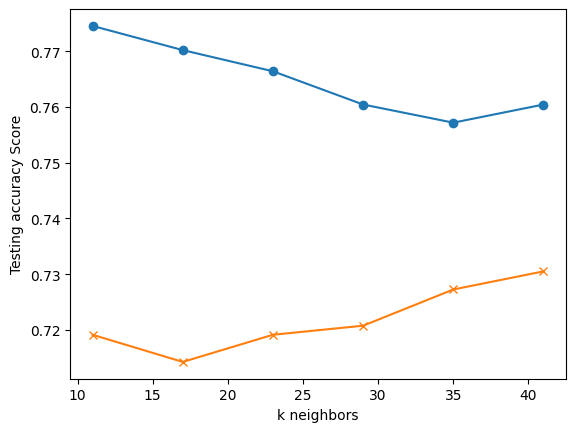

----------------------------------------------------
(2369, 3)
(2369,)
Judo
k: 11, Train/Test Score: 0.856/0.855
k: 17, Train/Test Score: 0.856/0.860


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 23, Train/Test Score: 0.856/0.860
k: 29, Train/Test Score: 0.856/0.860
k: 35, Train/Test Score: 0.856/0.860
k: 41, Train/Test Score: 0.856/0.860


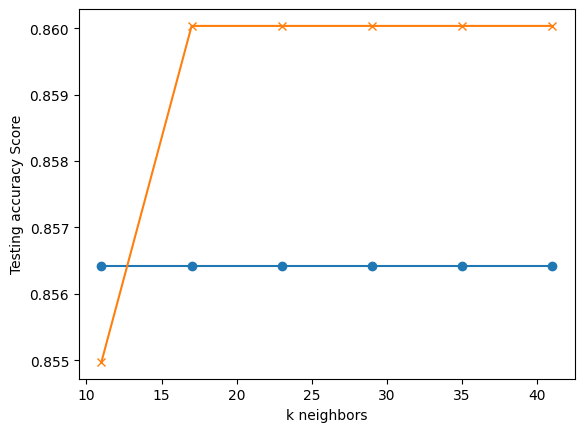

----------------------------------------------------
(3459, 3)
(3459,)
Football
k: 11, Train/Test Score: 0.785/0.762


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.781/0.764
k: 23, Train/Test Score: 0.778/0.758
k: 29, Train/Test Score: 0.779/0.764
k: 35, Train/Test Score: 0.776/0.764
k: 41, Train/Test Score: 0.776/0.764


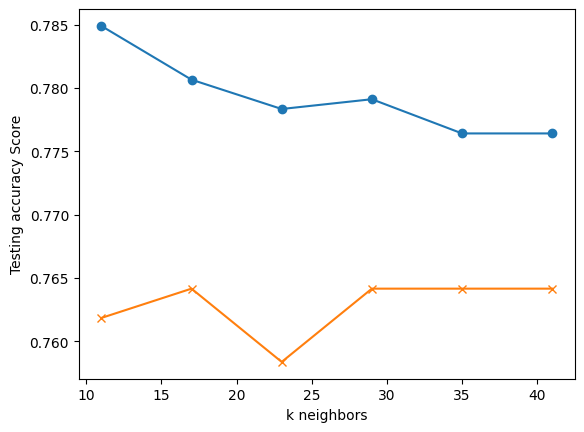

----------------------------------------------------
(20, 3)
(20,)
Tug-Of-War


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.800/0.800
An exception occurred
----------------------------------------------------
(21391, 3)
(21391,)
Athletics


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.890/0.877
k: 17, Train/Test Score: 0.890/0.879
k: 23, Train/Test Score: 0.890/0.879
k: 29, Train/Test Score: 0.890/0.879
k: 35, Train/Test Score: 0.890/0.879
k: 41, Train/Test Score: 0.890/0.879


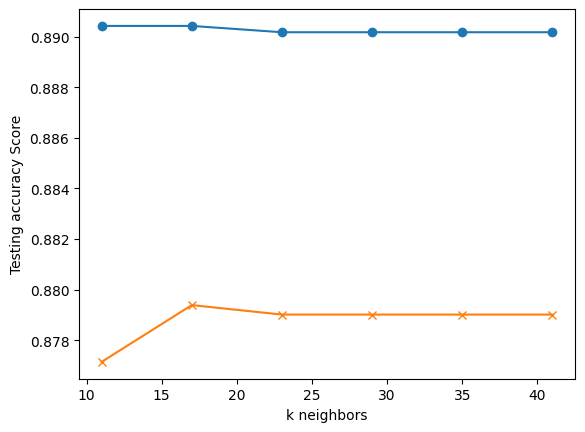

----------------------------------------------------
(10321, 3)
(10321,)
Swimming


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.877/0.870
k: 17, Train/Test Score: 0.875/0.870
k: 23, Train/Test Score: 0.873/0.873
k: 29, Train/Test Score: 0.872/0.873
k: 35, Train/Test Score: 0.872/0.873
k: 41, Train/Test Score: 0.872/0.873


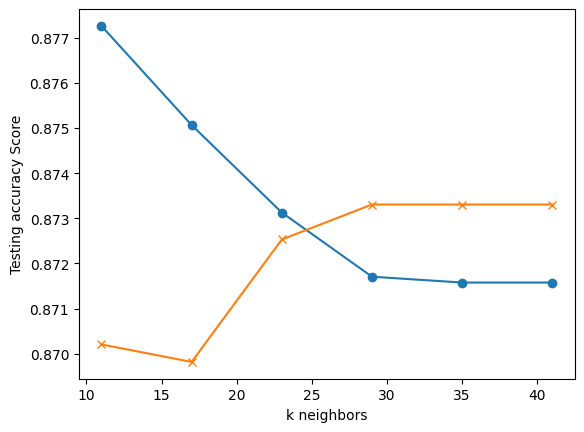

----------------------------------------------------
(702, 3)
(702,)
Badminton
k: 11, Train/Test Score: 0.882/0.886
k: 17, Train/Test Score: 0.882/0.892
k: 23, Train/Test Score: 0.882/0.892
k: 29, Train/Test Score: 0.882/0.892
k: 35, Train/Test Score: 0.882/0.892
k: 41, Train/Test Score: 0.882/0.892


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


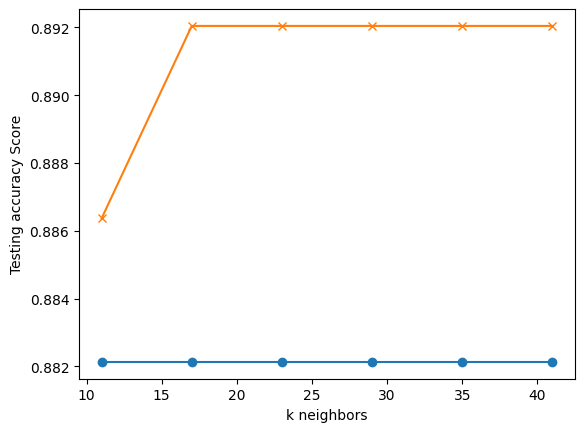

----------------------------------------------------
(3992, 3)
(3992,)
Sailing
k: 11, Train/Test Score: 0.861/0.862


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.862/0.862
k: 23, Train/Test Score: 0.862/0.862
k: 29, Train/Test Score: 0.862/0.862
k: 35, Train/Test Score: 0.862/0.862
k: 41, Train/Test Score: 0.862/0.862


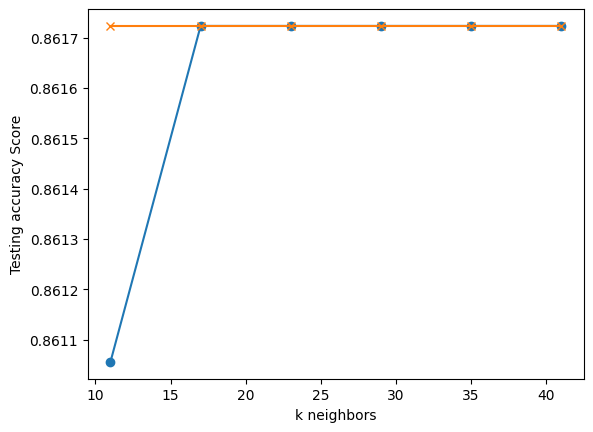

----------------------------------------------------
(10696, 3)
(10696,)
Gymnastics


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.941/0.937
k: 17, Train/Test Score: 0.940/0.938
k: 23, Train/Test Score: 0.940/0.937
k: 29, Train/Test Score: 0.940/0.937
k: 35, Train/Test Score: 0.940/0.937
k: 41, Train/Test Score: 0.940/0.937


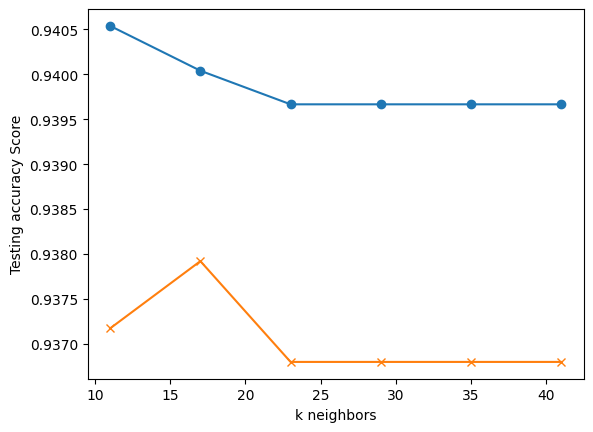

----------------------------------------------------
(28, 3)
(28,)
Art Competitions
k: 11, Train/Test Score: 0.905/1.000
k: 17, Train/Test Score: 0.905/1.000
An exception occurred
----------------------------------------------------
(2036, 3)
(2036,)
Handball
k: 11, Train/Test Score: 0.763/0.709


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.758/0.721
k: 23, Train/Test Score: 0.758/0.723
k: 29, Train/Test Score: 0.760/0.715
k: 35, Train/Test Score: 0.758/0.721
k: 41, Train/Test Score: 0.752/0.721


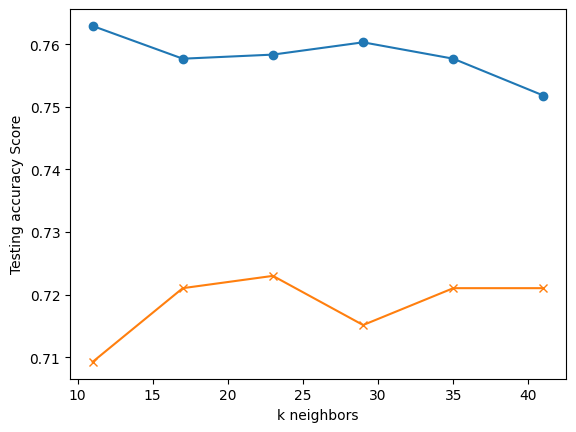

----------------------------------------------------
(2514, 3)
(2514,)
Weightlifting
k: 11, Train/Test Score: 0.833/0.830


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.831/0.830
k: 23, Train/Test Score: 0.830/0.830
k: 29, Train/Test Score: 0.830/0.830
k: 35, Train/Test Score: 0.830/0.830
k: 41, Train/Test Score: 0.830/0.830


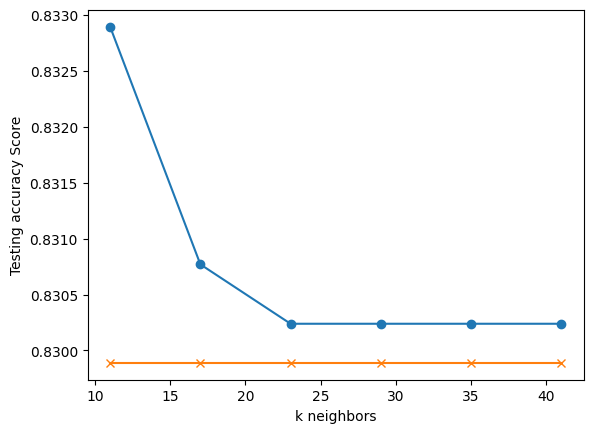

----------------------------------------------------
(4883, 3)
(4883,)
Wrestling


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.819/0.808
k: 17, Train/Test Score: 0.816/0.816
k: 23, Train/Test Score: 0.815/0.817
k: 29, Train/Test Score: 0.816/0.817
k: 35, Train/Test Score: 0.816/0.817
k: 41, Train/Test Score: 0.816/0.817


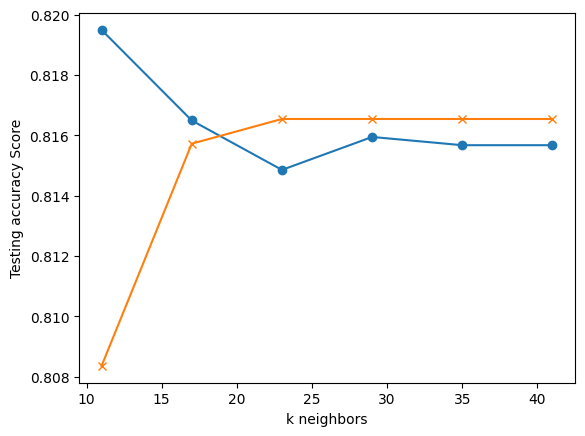

----------------------------------------------------
(2231, 3)
(2231,)
Water Polo
k: 11, Train/Test Score: 0.761/0.720


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.750/0.735
k: 23, Train/Test Score: 0.750/0.737
k: 29, Train/Test Score: 0.744/0.738
k: 35, Train/Test Score: 0.745/0.740
k: 41, Train/Test Score: 0.743/0.740


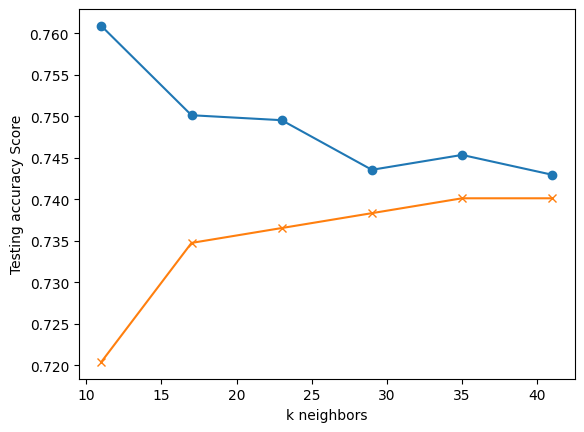

----------------------------------------------------
(2874, 3)
(2874,)
Hockey
k: 11, Train/Test Score: 0.755/0.736


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.753/0.739
k: 23, Train/Test Score: 0.749/0.748
k: 29, Train/Test Score: 0.748/0.744
k: 35, Train/Test Score: 0.749/0.757
k: 41, Train/Test Score: 0.749/0.759


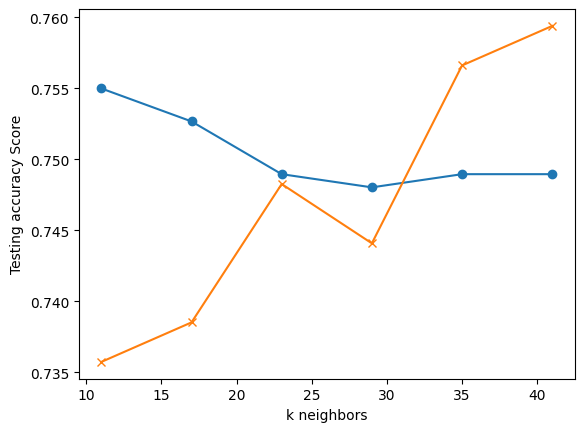

----------------------------------------------------
(5667, 3)
(5667,)
Rowing


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.763/0.729
k: 17, Train/Test Score: 0.755/0.748
k: 23, Train/Test Score: 0.753/0.755
k: 29, Train/Test Score: 0.756/0.754
k: 35, Train/Test Score: 0.756/0.754
k: 41, Train/Test Score: 0.755/0.754


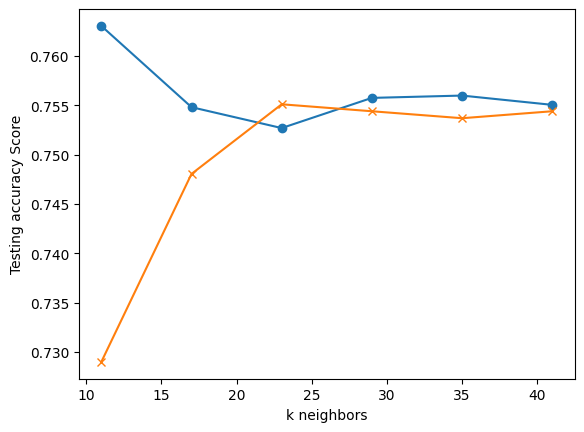

----------------------------------------------------
(4763, 3)
(4763,)
Fencing
k: 11, Train/Test Score: 0.835/0.835


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.833/0.841
k: 23, Train/Test Score: 0.833/0.843
k: 29, Train/Test Score: 0.833/0.843
k: 35, Train/Test Score: 0.833/0.843
k: 41, Train/Test Score: 0.833/0.843


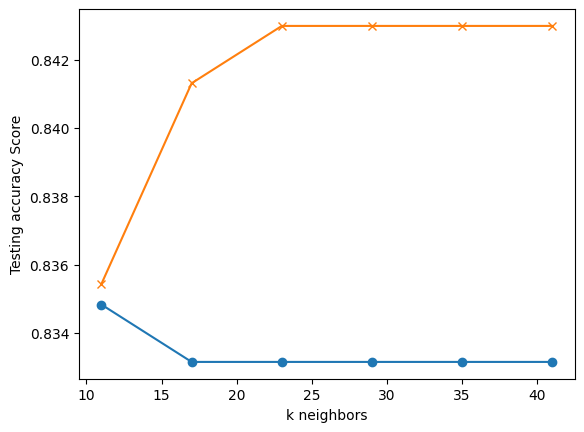

----------------------------------------------------
(3400, 3)
(3400,)
Equestrianism
k: 11, Train/Test Score: 0.858/0.875


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.855/0.878
k: 23, Train/Test Score: 0.855/0.879
k: 29, Train/Test Score: 0.856/0.879
k: 35, Train/Test Score: 0.856/0.879
k: 41, Train/Test Score: 0.856/0.879


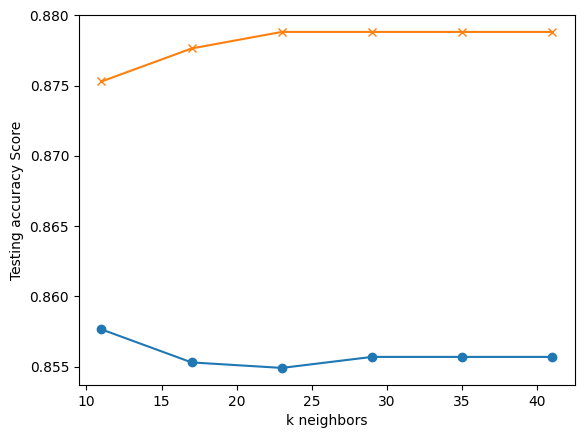

----------------------------------------------------
(5596, 3)
(5596,)
Shooting


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.931/0.924
k: 17, Train/Test Score: 0.931/0.924
k: 23, Train/Test Score: 0.931/0.924
k: 29, Train/Test Score: 0.931/0.924
k: 35, Train/Test Score: 0.931/0.924
k: 41, Train/Test Score: 0.931/0.924


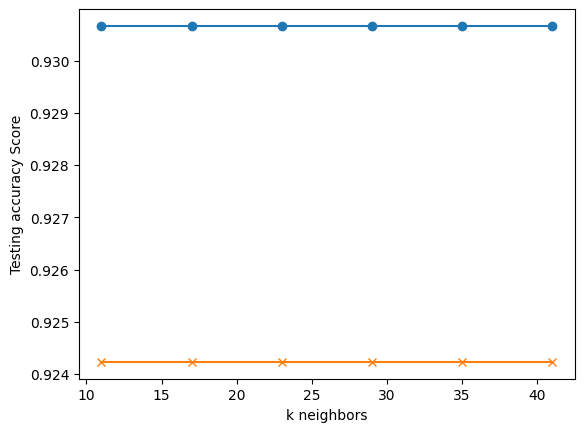

----------------------------------------------------
(4304, 3)
(4304,)
Boxing
k: 11, Train/Test Score: 0.836/0.847


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.838/0.849
k: 23, Train/Test Score: 0.838/0.849
k: 29, Train/Test Score: 0.838/0.849
k: 35, Train/Test Score: 0.838/0.849
k: 41, Train/Test Score: 0.838/0.849


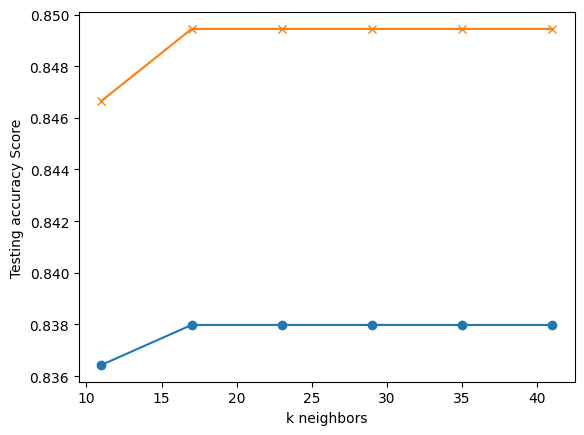

----------------------------------------------------
(306, 3)
(306,)
Taekwondo
k: 11, Train/Test Score: 0.769/0.766
k: 17, Train/Test Score: 0.764/0.753
k: 23, Train/Test Score: 0.760/0.766
k: 29, Train/Test Score: 0.760/0.779
k: 35, Train/Test Score: 0.760/0.779
k: 41, Train/Test Score: 0.760/0.779


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


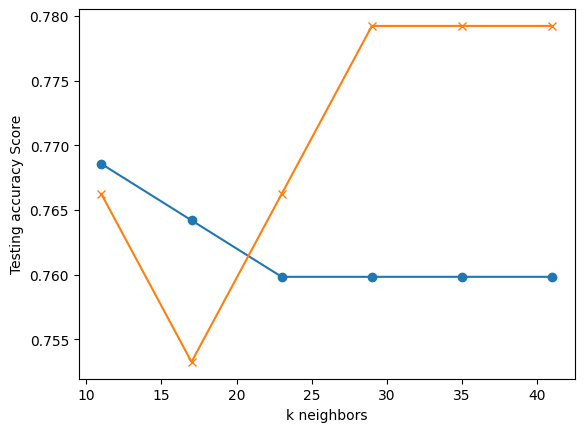

----------------------------------------------------
(6437, 3)
(6437,)
Cycling


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.902/0.880
k: 17, Train/Test Score: 0.902/0.881
k: 23, Train/Test Score: 0.901/0.881
k: 29, Train/Test Score: 0.901/0.881
k: 35, Train/Test Score: 0.901/0.881
k: 41, Train/Test Score: 0.901/0.881


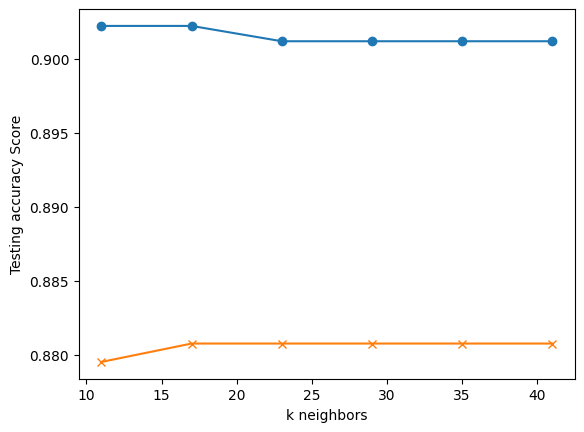

----------------------------------------------------
(1043, 3)
(1043,)
Diving
k: 11, Train/Test Score: 0.841/0.851
k: 17, Train/Test Score: 0.847/0.858
k: 23, Train/Test Score: 0.847/0.858


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 29, Train/Test Score: 0.847/0.858
k: 35, Train/Test Score: 0.847/0.858
k: 41, Train/Test Score: 0.847/0.858


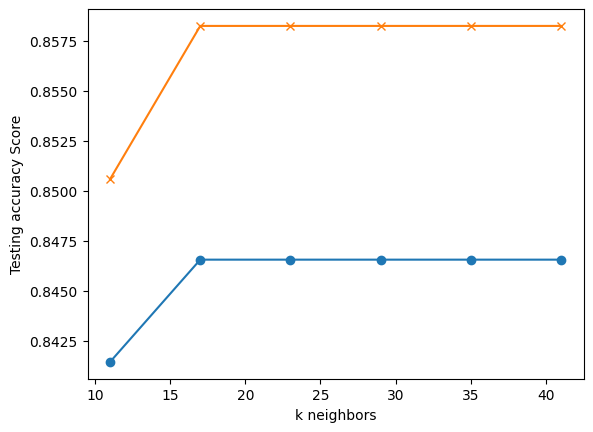

----------------------------------------------------
(4270, 3)
(4270,)
Canoeing


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 11, Train/Test Score: 0.829/0.803
k: 17, Train/Test Score: 0.825/0.804
k: 23, Train/Test Score: 0.825/0.803
k: 29, Train/Test Score: 0.825/0.803
k: 35, Train/Test Score: 0.825/0.803
k: 41, Train/Test Score: 0.825/0.803


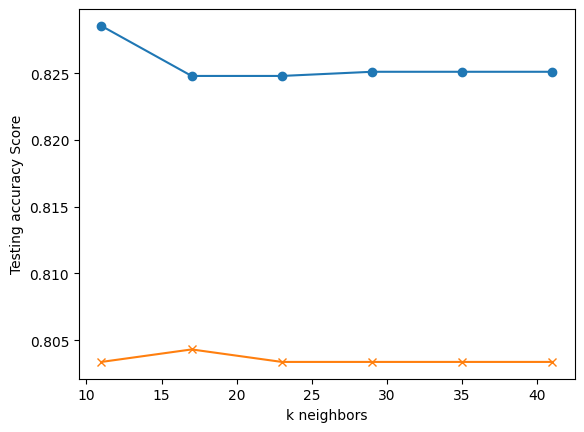

----------------------------------------------------
(1044, 3)
(1044,)
Tennis
k: 11, Train/Test Score: 0.925/0.885
k: 17, Train/Test Score: 0.925/0.885
k: 23, Train/Test Score: 0.925/0.885


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 29, Train/Test Score: 0.925/0.885
k: 35, Train/Test Score: 0.925/0.885
k: 41, Train/Test Score: 0.925/0.885


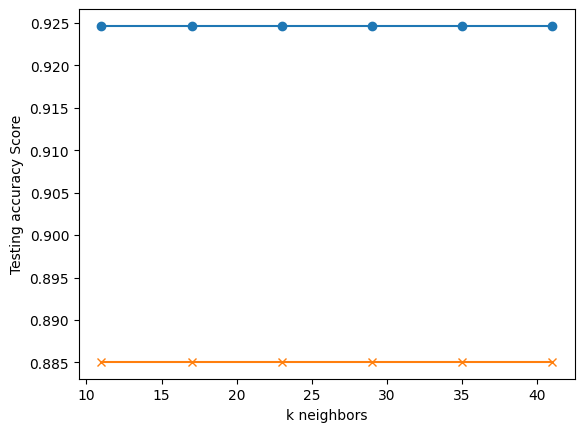

----------------------------------------------------
(1095, 3)
(1095,)
Modern Pentathlon
k: 11, Train/Test Score: 0.875/0.872
k: 17, Train/Test Score: 0.875/0.872
k: 23, Train/Test Score: 0.875/0.872
k: 29, Train/Test Score: 0.875/0.872


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 35, Train/Test Score: 0.875/0.872
k: 41, Train/Test Score: 0.875/0.872


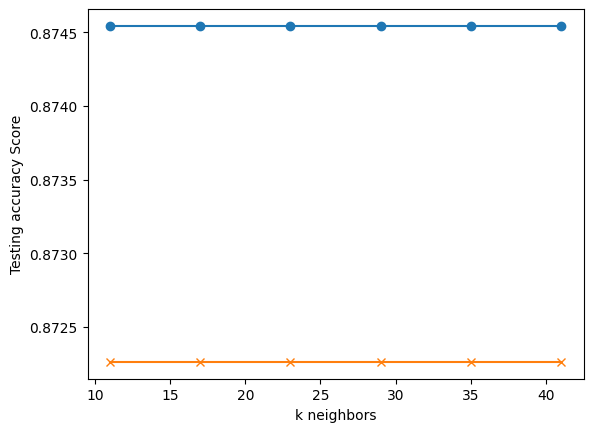

----------------------------------------------------
(53, 3)
(53,)
Golf
k: 11, Train/Test Score: 0.974/0.929
k: 17, Train/Test Score: 0.974/0.929
k: 23, Train/Test Score: 0.974/0.929
k: 29, Train/Test Score: 0.974/0.929
k: 35, Train/Test Score: 0.974/0.929
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Softball
An exception occurred
----------------------------------------------------
(1000, 3)
(1000,)
Archery
k: 11, Train/Test Score: 0.895/0.888


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 17, Train/Test Score: 0.893/0.896
k: 23, Train/Test Score: 0.892/0.900
k: 29, Train/Test Score: 0.892/0.900
k: 35, Train/Test Score: 0.892/0.900
k: 41, Train/Test Score: 0.892/0.900


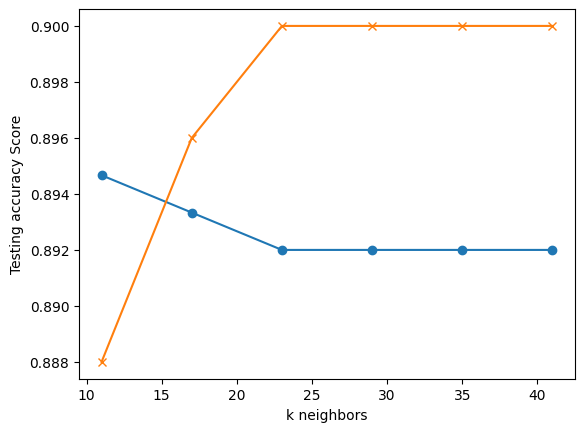

----------------------------------------------------
(1782, 3)
(1782,)
Volleyball
k: 11, Train/Test Score: 0.753/0.677
k: 17, Train/Test Score: 0.748/0.677


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 23, Train/Test Score: 0.746/0.673
k: 29, Train/Test Score: 0.735/0.675
k: 35, Train/Test Score: 0.736/0.684
k: 41, Train/Test Score: 0.737/0.684


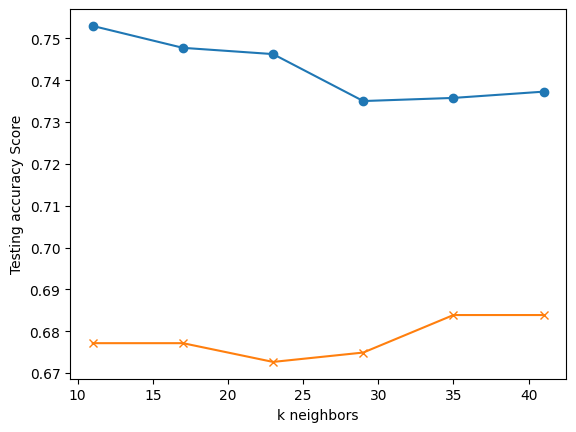

----------------------------------------------------
(0, 3)
(0,)
Synchronized Swimming
An exception occurred
----------------------------------------------------
(927, 3)
(927,)
Table Tennis
k: 11, Train/Test Score: 0.906/0.922
k: 17, Train/Test Score: 0.906/0.922
k: 23, Train/Test Score: 0.906/0.922
k: 29, Train/Test Score: 0.906/0.922


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 35, Train/Test Score: 0.906/0.922
k: 41, Train/Test Score: 0.906/0.922


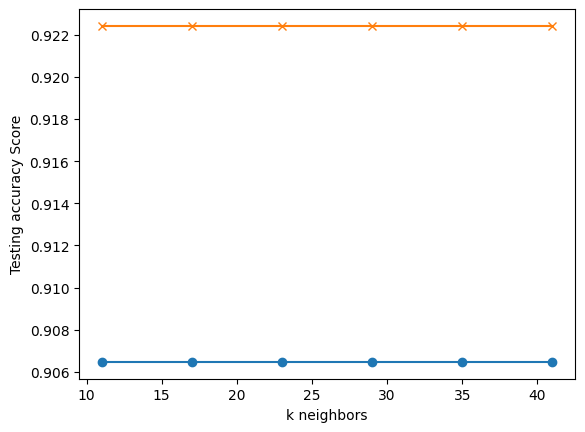

----------------------------------------------------
(846, 3)
(846,)
Baseball
k: 11, Train/Test Score: 0.650/0.594
k: 17, Train/Test Score: 0.648/0.580
k: 23, Train/Test Score: 0.623/0.580
k: 29, Train/Test Score: 0.621/0.594


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


k: 35, Train/Test Score: 0.621/0.580
k: 41, Train/Test Score: 0.618/0.571


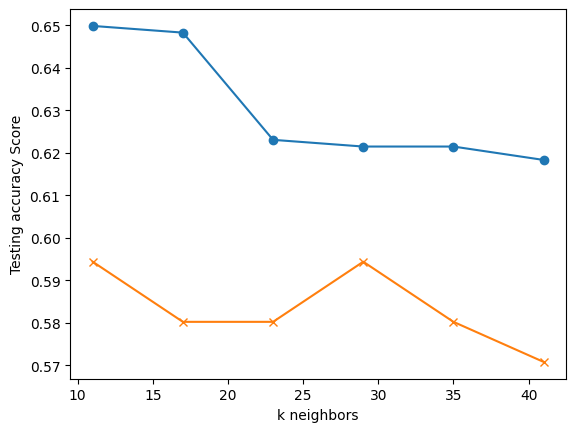

----------------------------------------------------
(0, 3)
(0,)
Rhythmic Gymnastics
An exception occurred
----------------------------------------------------
(151, 3)
(151,)
Rugby Sevens
k: 11, Train/Test Score: 0.779/0.632
k: 17, Train/Test Score: 0.779/0.658
k: 23, Train/Test Score: 0.779/0.658
k: 29, Train/Test Score: 0.779/0.658
k: 35, Train/Test Score: 0.779/0.658
k: 41, Train/Test Score: 0.779/0.658


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


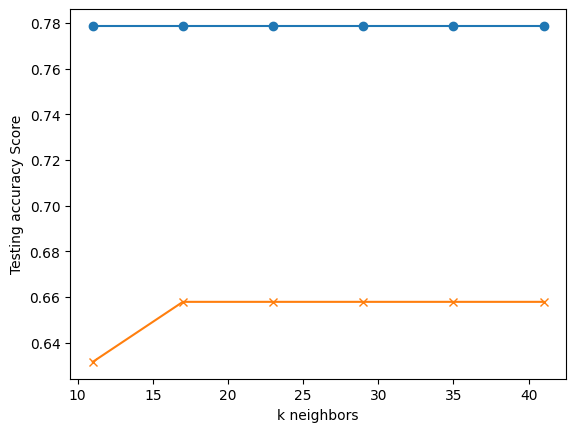

----------------------------------------------------
(74, 3)
(74,)
Trampolining
k: 11, Train/Test Score: 0.745/0.895
k: 17, Train/Test Score: 0.745/0.947
k: 23, Train/Test Score: 0.745/0.947
k: 29, Train/Test Score: 0.745/0.947
k: 35, Train/Test Score: 0.745/0.947
k: 41, Train/Test Score: 0.745/0.947


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


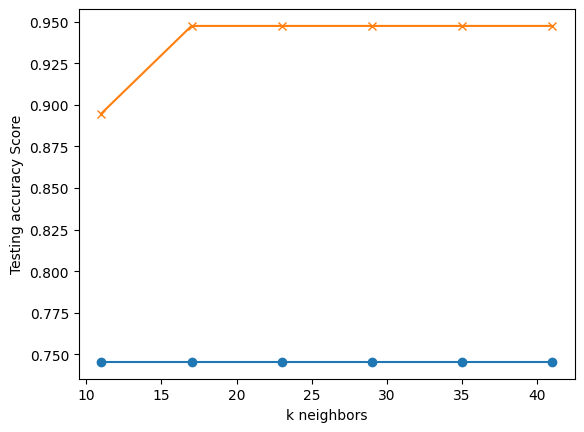

----------------------------------------------------
(273, 3)
(273,)
Beach Volleyball
k: 11, Train/Test Score: 0.873/0.913
k: 17, Train/Test Score: 0.868/0.913
k: 23, Train/Test Score: 0.868/0.913
k: 29, Train/Test Score: 0.868/0.913
k: 35, Train/Test Score: 0.868/0.913
k: 41, Train/Test Score: 0.868/0.913


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


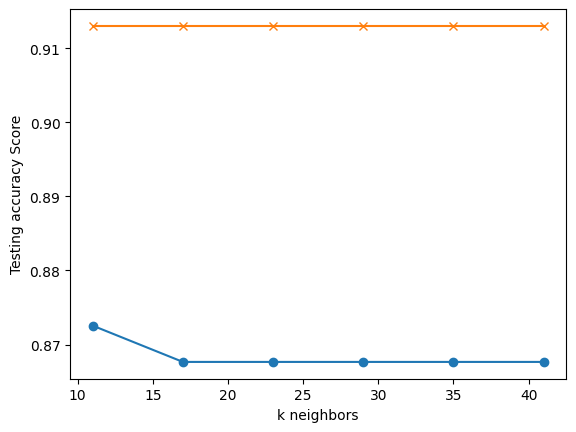

----------------------------------------------------
(265, 3)
(265,)
Triathlon
k: 11, Train/Test Score: 0.955/0.910
k: 17, Train/Test Score: 0.955/0.910
k: 23, Train/Test Score: 0.955/0.910
k: 29, Train/Test Score: 0.955/0.910
k: 35, Train/Test Score: 0.955/0.910
k: 41, Train/Test Score: 0.955/0.910


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Bronze", 1)


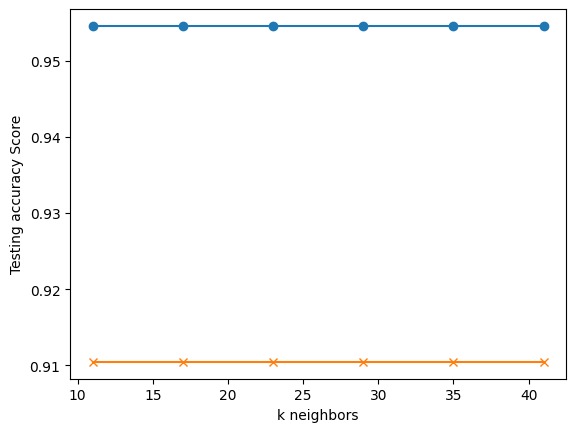

----------------------------------------------------
(30, 3)
(30,)
Rugby
k: 11, Train/Test Score: 1.000/1.000
k: 17, Train/Test Score: 1.000/1.000
An exception occurred
----------------------------------------------------
(2, 3)
(2,)
Lacrosse
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Polo
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Cricket
An exception occurred
----------------------------------------------------
(18, 3)
(18,)
Ice Hockey
k: 11, Train/Test Score: 1.000/1.000
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Racquets
An exception occurred
----------------------------------------------------


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Silver", 1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Gold", 1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.inf

(1, 3)
(1,)
Motorboating
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Croquet
An exception occurred
----------------------------------------------------
(1, 3)
(1,)
Figure Skating
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Jeu De Paume
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Roque
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Basque Pelota
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Alpinism
An exception occurred
----------------------------------------------------
(0, 3)
(0,)
Aeronautics
An exception occurred
----------------------------------------------------


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\1176416700.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athlete_m = athlete_m.replace("Gold", 1)


In [7]:
# For loop to train the KNN model and get the testing score for male athletes in every Summer Olympic Sport

for sport in summer_sports:
    try:
        athlete_m = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "M")]
        athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
        athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding                
        athlete_m = athlete_m.replace("Gold", 1)
        athlete_m = athlete_m.replace("Silver", 1)
        athlete_m = athlete_m.replace("Bronze", 1)
        athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
        athlete_m = athlete_m.dropna()
        athlete_m["Medal"].unique()
        
        # Assign X (data) and y (target)        
        X = athlete_m[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_m['Medal'] 
        print(y.shape)
        print(sport)

        # Split our data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a StandardScater model and fit it to the training data 
        X_scaler = StandardScaler().fit(X_train)
        
        # Transform the training and testing data using the X_scaler and y_scaler models
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)
        
        train_scores = []
        test_scores = []
        
        # Loop through different k values to see which has the highest accuracy
        for k in range(11, 47, 6):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_scaled, y_train)
            train_score = knn.score(X_train_scaled, y_train)
            test_score = knn.score(X_test_scaled, y_test)
            train_scores.append(train_score)
            test_scores.append(test_score)
            print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


        plt.plot(range(11, 47, 6), train_scores, marker='o')
        plt.plot(range(11, 47, 6), test_scores, marker="x")
        plt.xlabel("k neighbors")
        plt.ylabel("Testing accuracy Score")
        plt.show()
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

## KNN model for Male Athletes in Gymnastics

In [8]:
Gymnastics_M = summer_data[(summer_data["Sport"] == "Gymnastics") & (summer_data["Sex"] == "M")]

In [9]:
Gymnastics_M = Gymnastics_M[["Age", "Height", "Weight", "Medal"]]
Gymnastics_M = Gymnastics_M.dropna(subset=['Height', 'Weight']).reset_index(drop = True)

In [10]:
# One-hot encoding
Gymnastics_M = Gymnastics_M.replace("Gold", 1)
Gymnastics_M = Gymnastics_M.replace("Silver", 1)
Gymnastics_M = Gymnastics_M.replace("Bronze", 1)
Gymnastics_M["Medal"] = Gymnastics_M["Medal"].fillna(0)
Gymnastics_M = Gymnastics_M.dropna()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20084\2983363567.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Gymnastics_M = Gymnastics_M.replace("Bronze", 1)


In [11]:
# Assign y (target)
y = Gymnastics_M["Medal"]
target_names = ["Medals", "None"]

In [12]:
# Assign X (data)
X = Gymnastics_M.drop("Medal", axis=1)
X.head()

,Age,Height,Weight
0,28.0,175.0,64.0
1,28.0,175.0,64.0
2,28.0,175.0,64.0
3,28.0,175.0,64.0
4,28.0,175.0,64.0


In [13]:
# Split our data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 11, Train/Test Score: 0.941/0.937
k: 17, Train/Test Score: 0.940/0.938
k: 23, Train/Test Score: 0.940/0.937
k: 29, Train/Test Score: 0.940/0.937
k: 35, Train/Test Score: 0.940/0.937
k: 41, Train/Test Score: 0.940/0.937


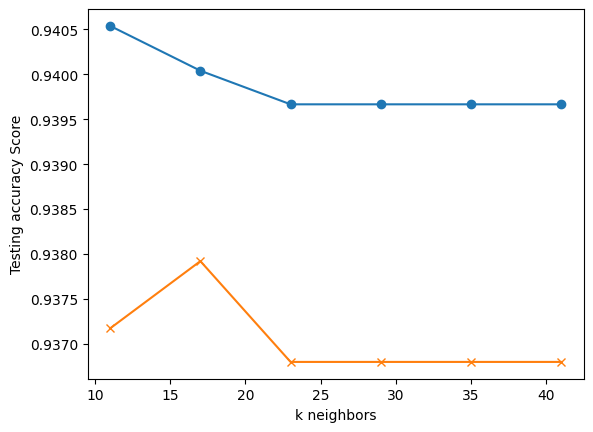

In [16]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(11, 47, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(11, 47, 6), train_scores, marker='o')
plt.plot(range(11, 47, 6), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.938
